
Here we want to solve, numerically, the OLS Simple Regression Problem. Let me recall that in this problem we have a Dataset of pairs $(x_i, y_i),\ i = 1, ..., n$, and we want to find the Regression Line
$$
\widehat{y}=\widehat{\beta_0}+\widehat{\beta_1}\cdot x
$$
OLS method suggests to minimize the Least Squares Error:
$$
MSE(\beta_0,\beta_1)=\frac{1}{n}\cdot \sum_{k=1}^{n}(y_k-\beta_0-\beta_1 x_k)^2
$$
Here our aim is to solve this minimization problem numerically. To that end,

Generate a Dataset of 2000 random points around some line;

In [37]:
import numpy as np
import matplotlib.pyplot as plt
f = lambda x: c*x + b
n = 2000
c = 5
b = 1
h = 3
x = np.random.rand(n)
y = (f(x) + h * np.random.normal(size=n))

array([0.80558751, 0.18991022, 0.26233339, ..., 0.72011604, 0.63374572,
       0.27521497])

Implement the Gradient Descent algorithm to solve this problem numerically, and calculate the numerical values of $\beta_0, \beta_1$ using that algorithm, starting from some initial approximation for $(\beta_0, \beta_1)$;

In [4]:
b_0, b_1 = 0, 0
alpha = 0.01
path_x = [b_0]
path_y = [b_1]
def nabla(x, y, b_0, b_1):
    nabla1 = y - b_0 - b_1*x
    nabla2 = y - b_0 - b_1*x
    return np.array([sum(nabla1 * 2/n), sum(nabla2 * (2*x)/n)])
for i in range(n):
    b_0 = b_0 + alpha*nabla(x, y, b_0, b_1)[0]
    b_1 = b_1 + alpha*nabla(x, y, b_0, b_1)[1]
    path_x.append(b_0)
    path_y.append(b_1)
b_0, b_1

(1.1418623883201615, 4.718783105632403)

Draw some level curves of $MSE(β_0, β_1)$ on the $(β_0, β_1)$ Cartesian plane, and show the GD approximation path for the solution (i.e., plot the approximation points and join consecutive points with line segments)

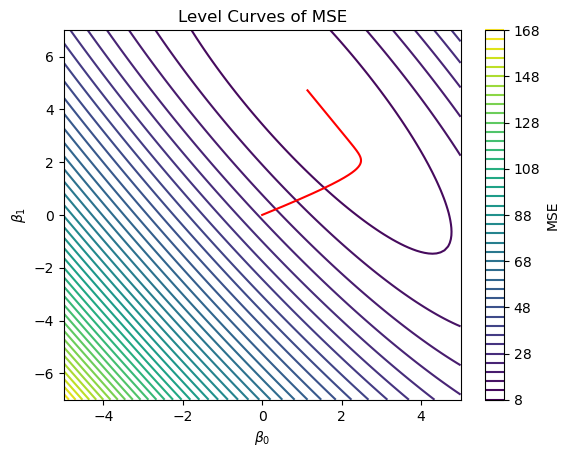

In [5]:
def mse(x, y, b0, b1):
    return np.mean((y - b0 - b1 * x) ** 2)

b_0_range = np.linspace(-5, 5, 100)
b_1_range = np.linspace(-7, 7, 100)
beta_0, beta_1 = np.meshgrid(b_0_range, b_1_range)
mse_values = np.array([[mse(x, y, b0, b1) for b0 in b_0_range] for b1 in b_1_range])
plt.contour(beta_0, beta_1, mse_values, levels=40, cmap='viridis')
plt.colorbar(label='MSE')
plt.xlabel('$\\beta_0$')
plt.ylabel('$\\beta_1$')
plt.title('Level Curves of MSE')
plt.plot(path_x, path_y, color='red')


Implement the Stochastic Gradient Descent algorithm to solve this problem numerically,
and calculate the numerical values of β0, β1 using that algorithm;

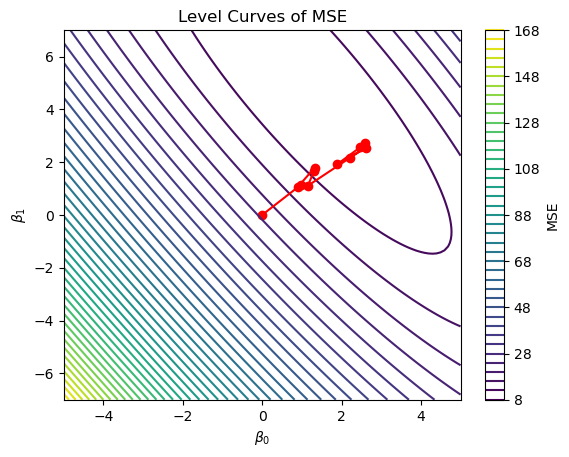

In [90]:
w = [0,0]
path_w1 = [0]
path_w2 = [0]
alpha = 0.1

def gradient(x, y, w):
    grad1 = 2*x*(y - w[0] - w[1]*x)
    grad2 = 2*(y - w[0] - w[1]*x)
    return np.array([grad1, grad2])
for z in range(10):
    i = np.random.randint(0, 2000)
    w[0] = w[0] + alpha*gradient(x[i], y[i], w)[0]
    w[1] = w[1] + alpha*gradient(x[i], y[i], w)[1]
    path_w1.append(w[0])
    path_w2.append(w[1])
plt.contour(beta_0, beta_1, mse_values, levels=40, cmap='viridis')
plt.colorbar(label='MSE')
plt.xlabel('$\\beta_0$')
plt.ylabel('$\\beta_1$')
plt.title('Level Curves of MSE')
plt.plot(path_w1, path_w2, color='red')
plt.scatter(path_w1, path_w2, color='red')